In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px
import numpy as np
import seaborn as sns
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import model_selection
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from xgboost.sklearn import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from xgboost import plot_importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

df = pd.read_csv("./preprocessed_housing_dataset.csv")
test = pd.read_csv("./preprocessed_housing_dataset_production.csv")


In [3]:
df.SalePrice.isna().sum()

0

In [4]:
df.shape

(1116, 145)

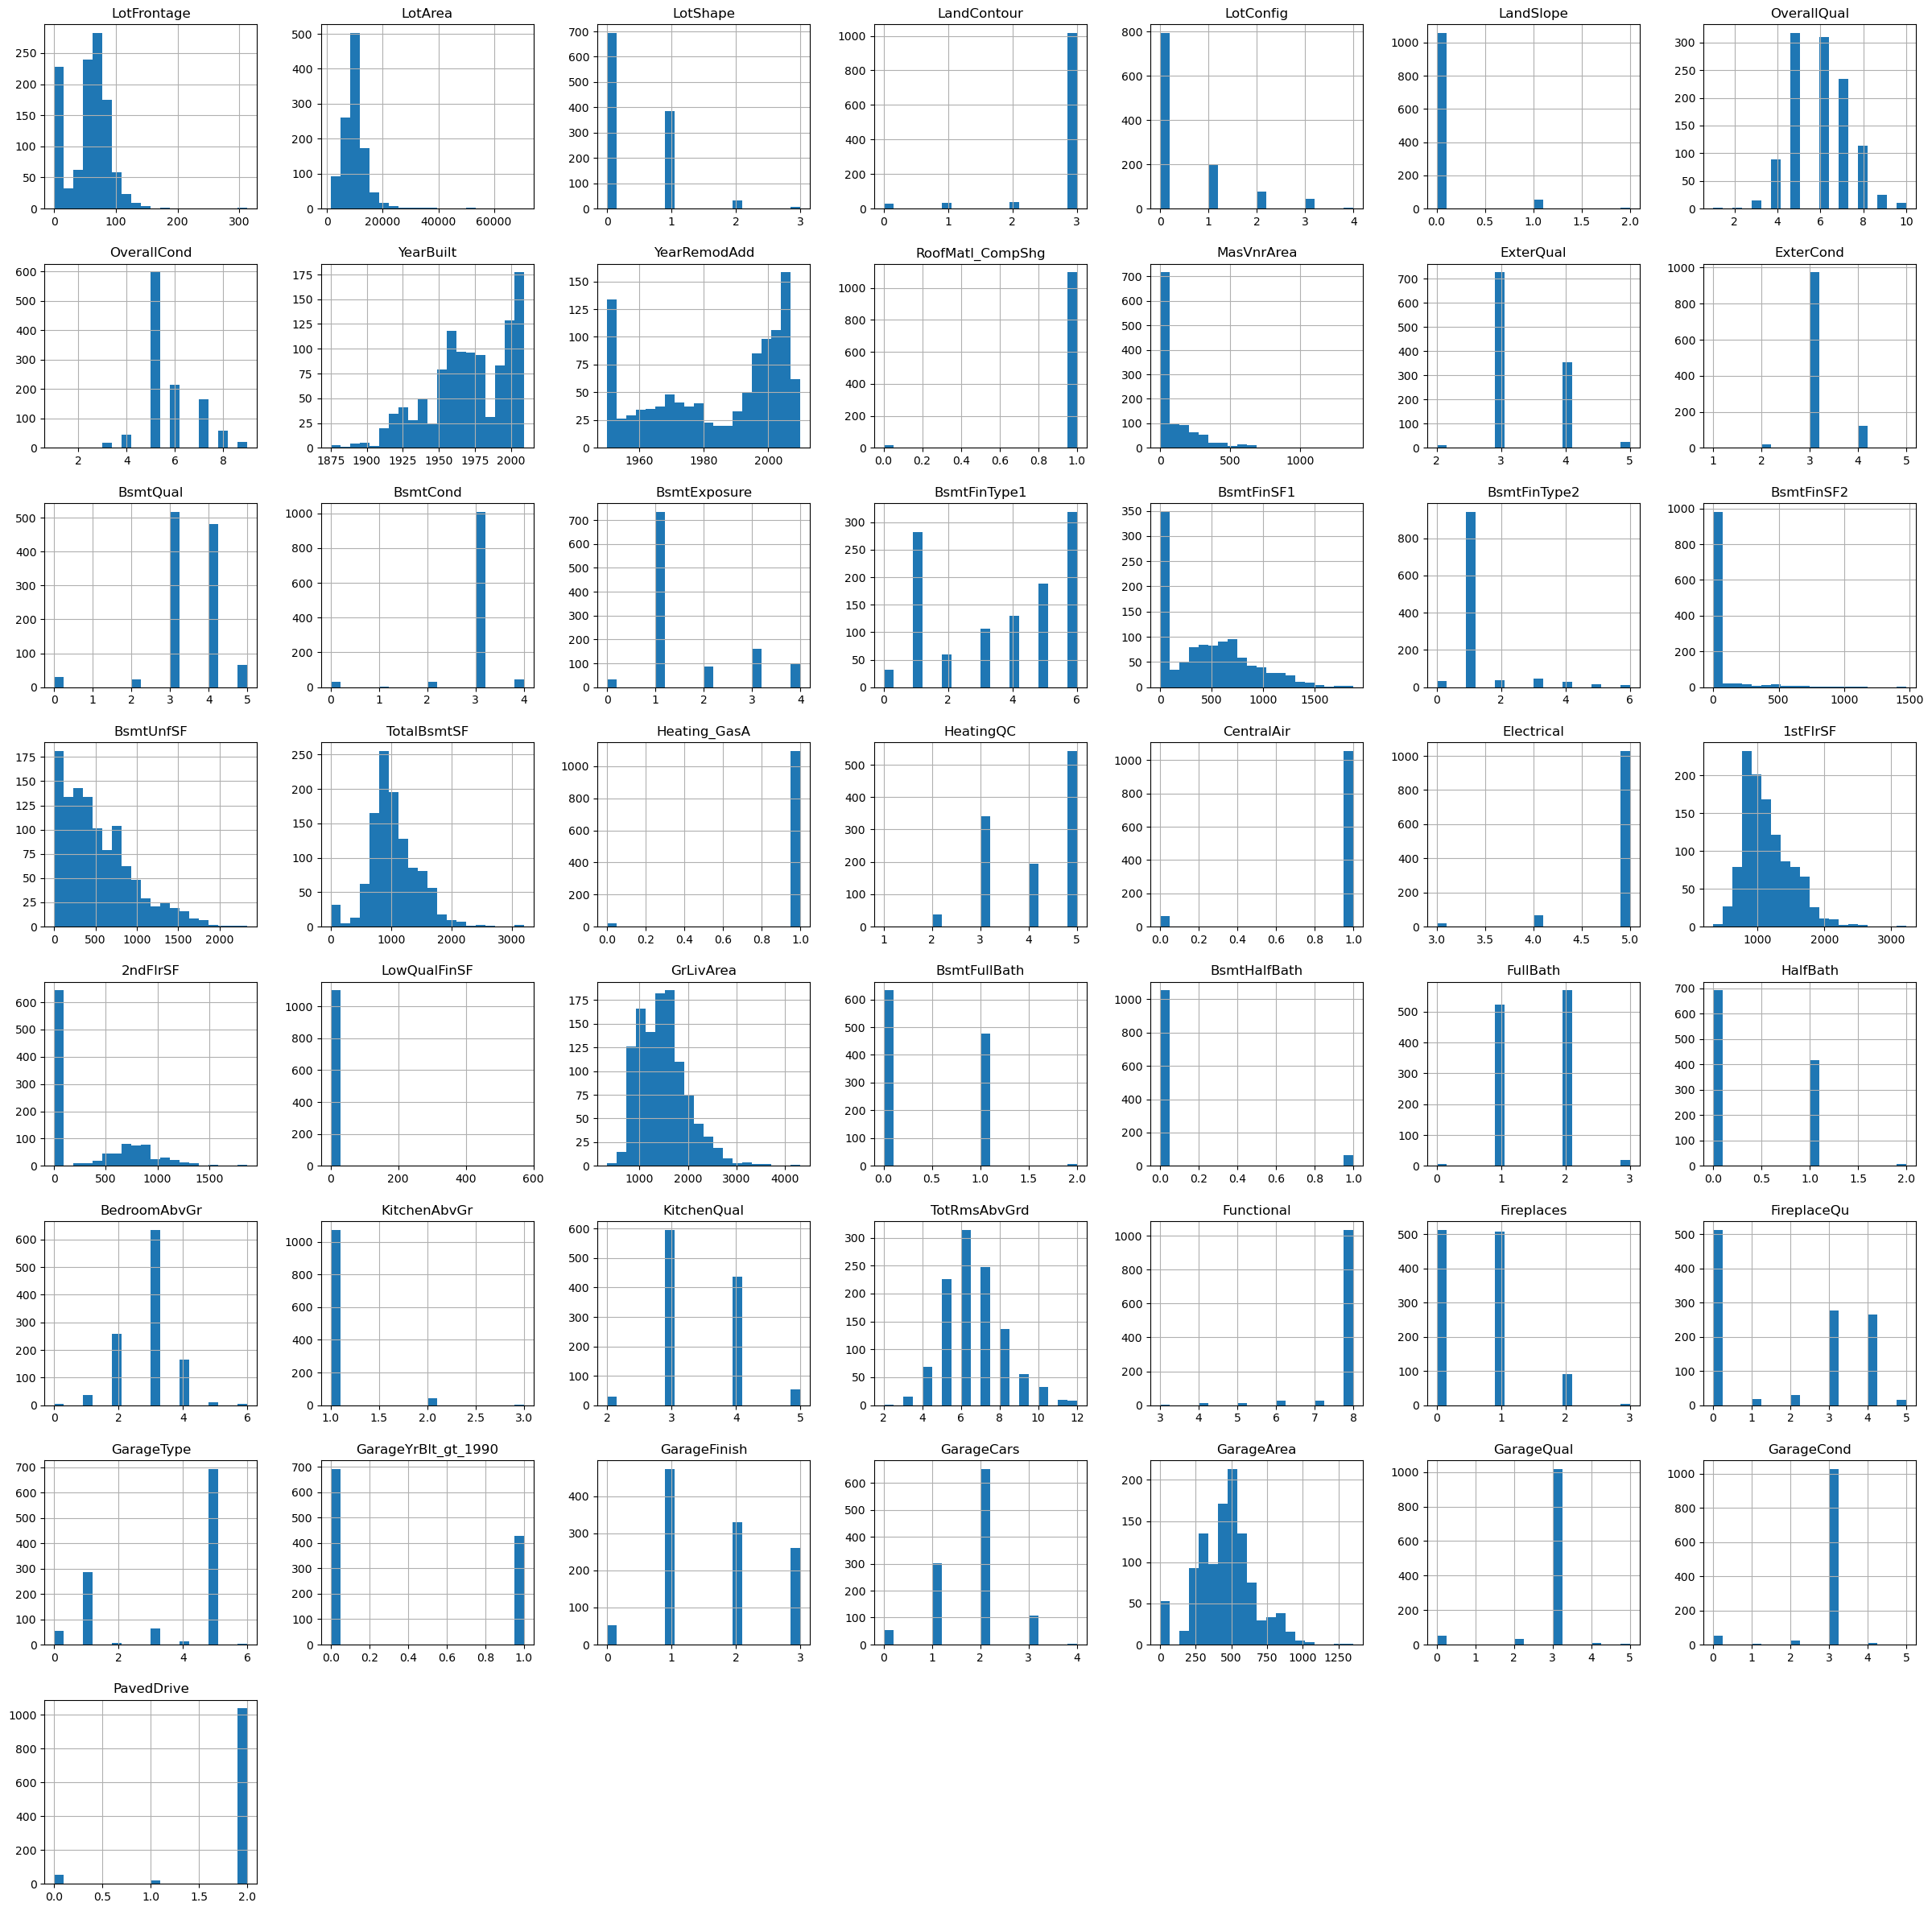

In [5]:
df.iloc[:,:50].hist(bins=20, figsize=(30,30))
plt.show()

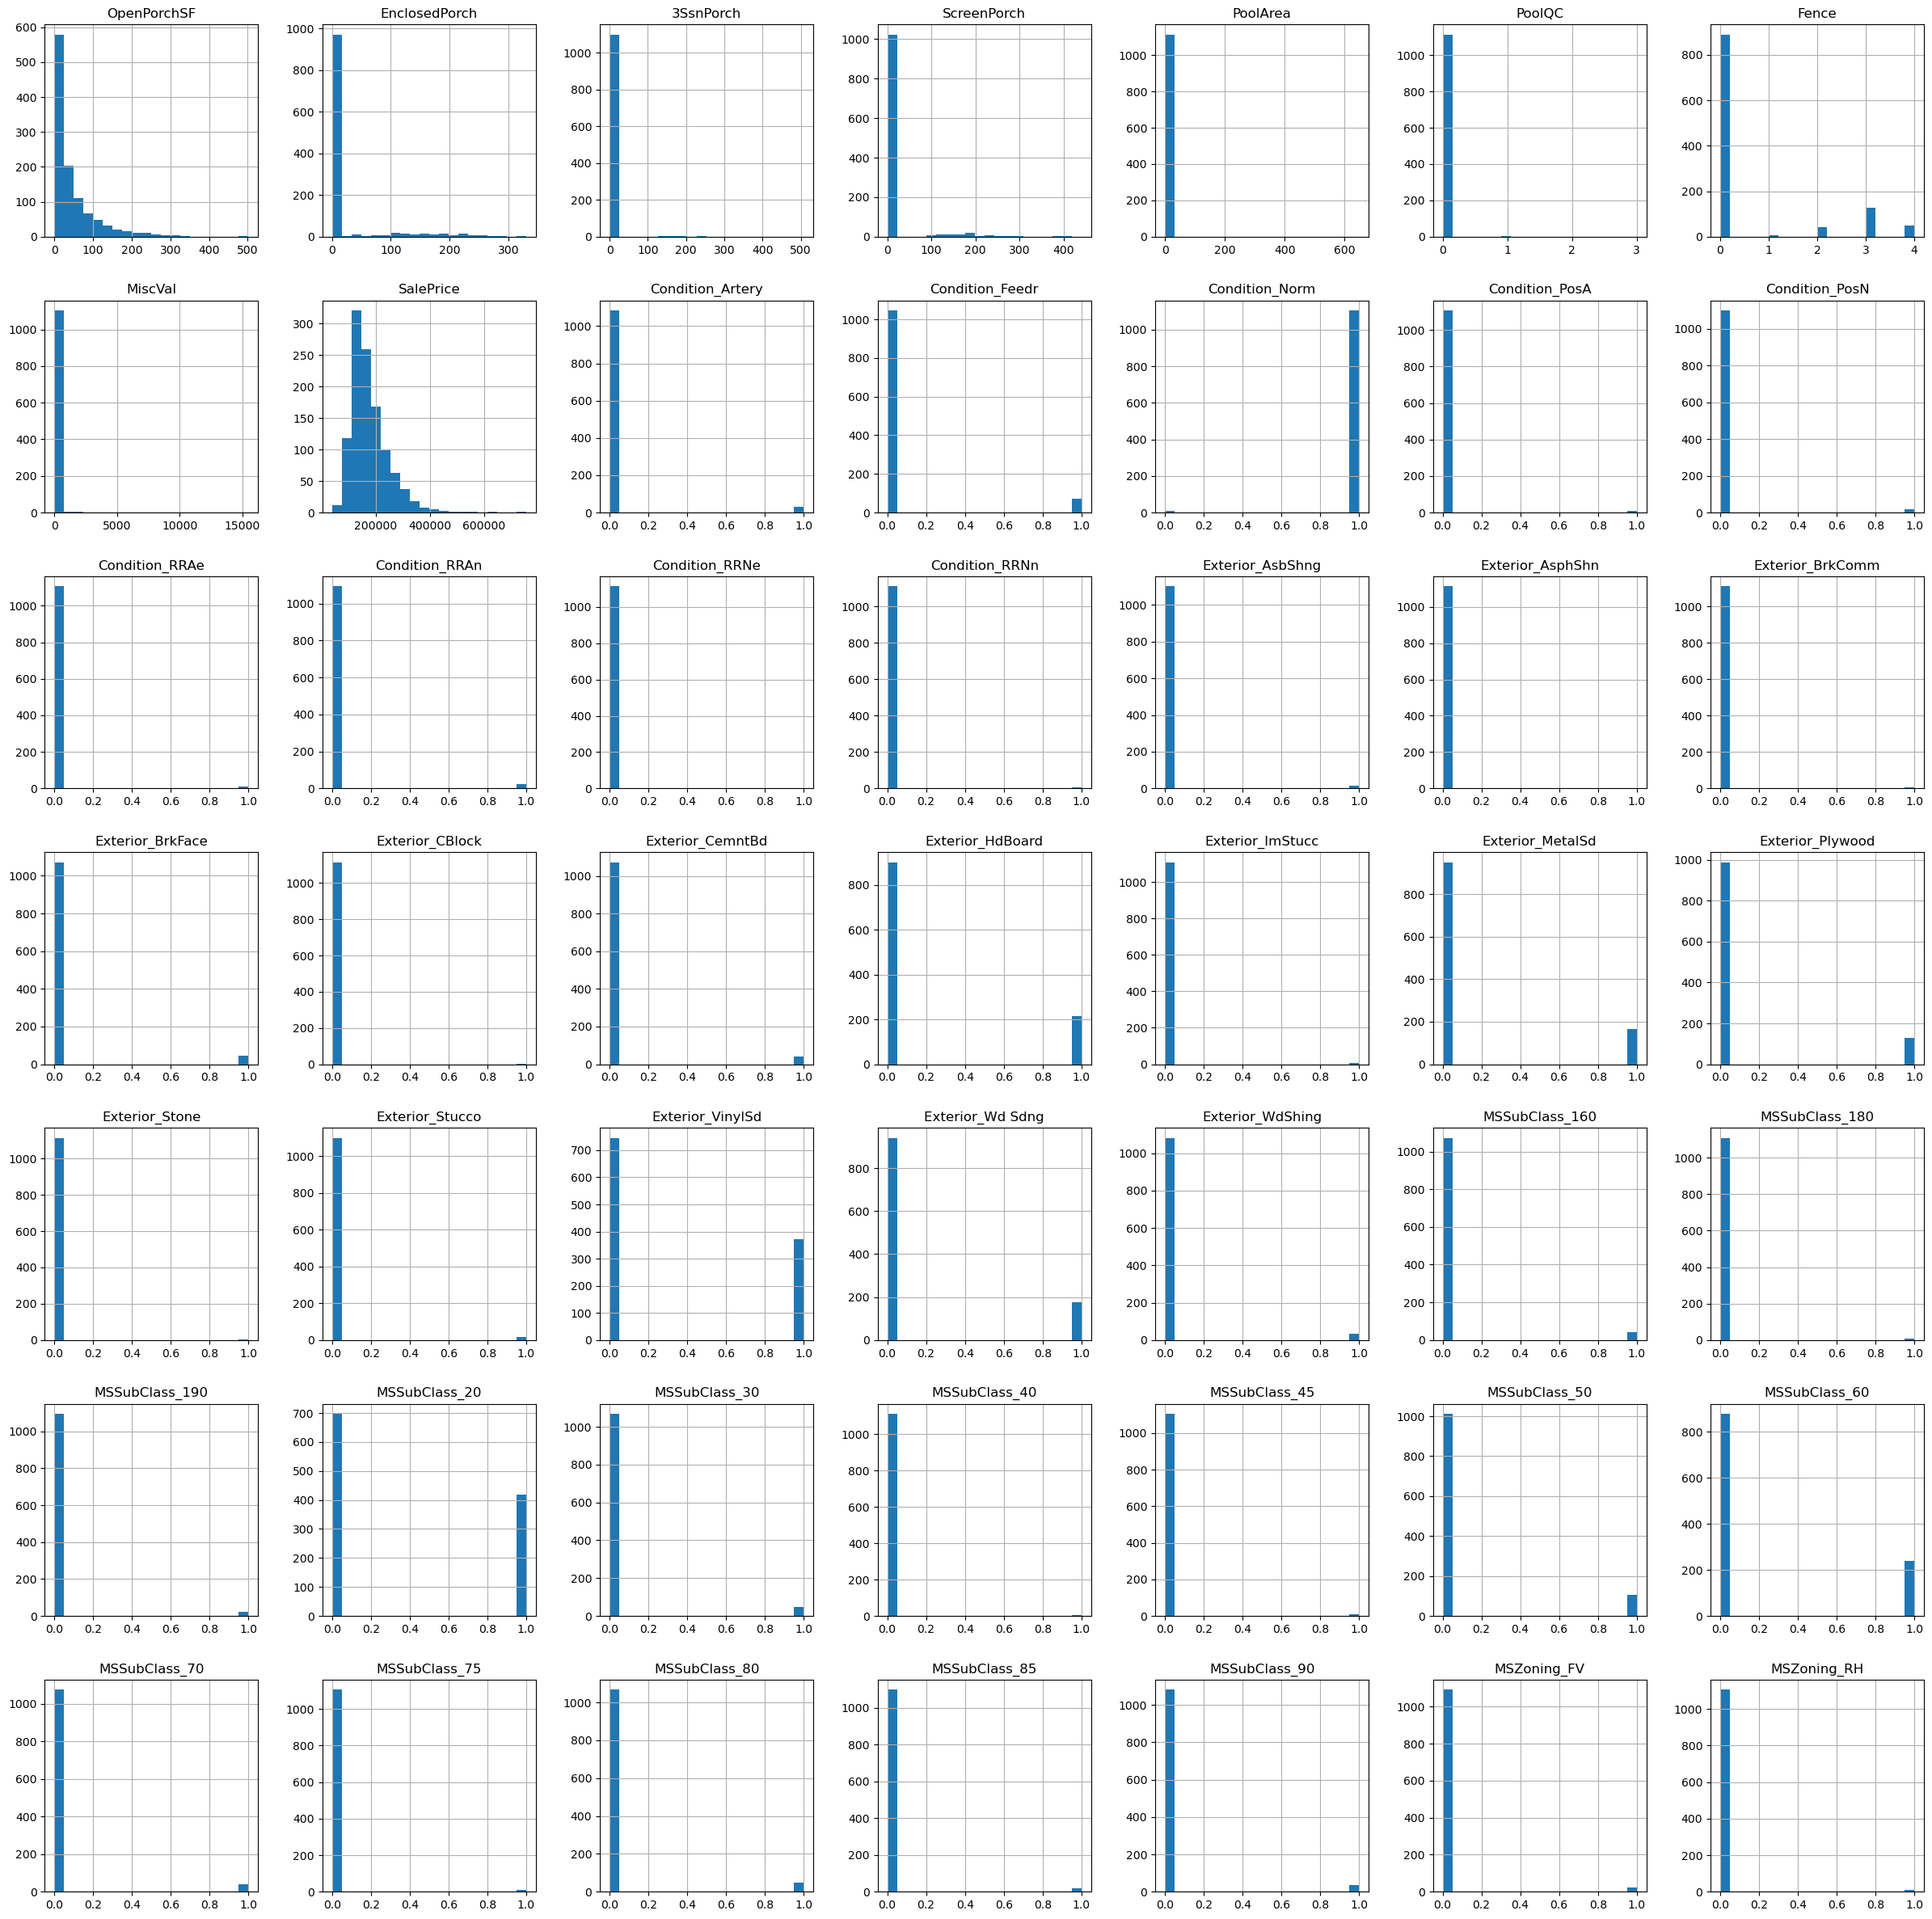

In [6]:
df.iloc[:,51:100].hist(bins=20, figsize=(30,30))
plt.show()

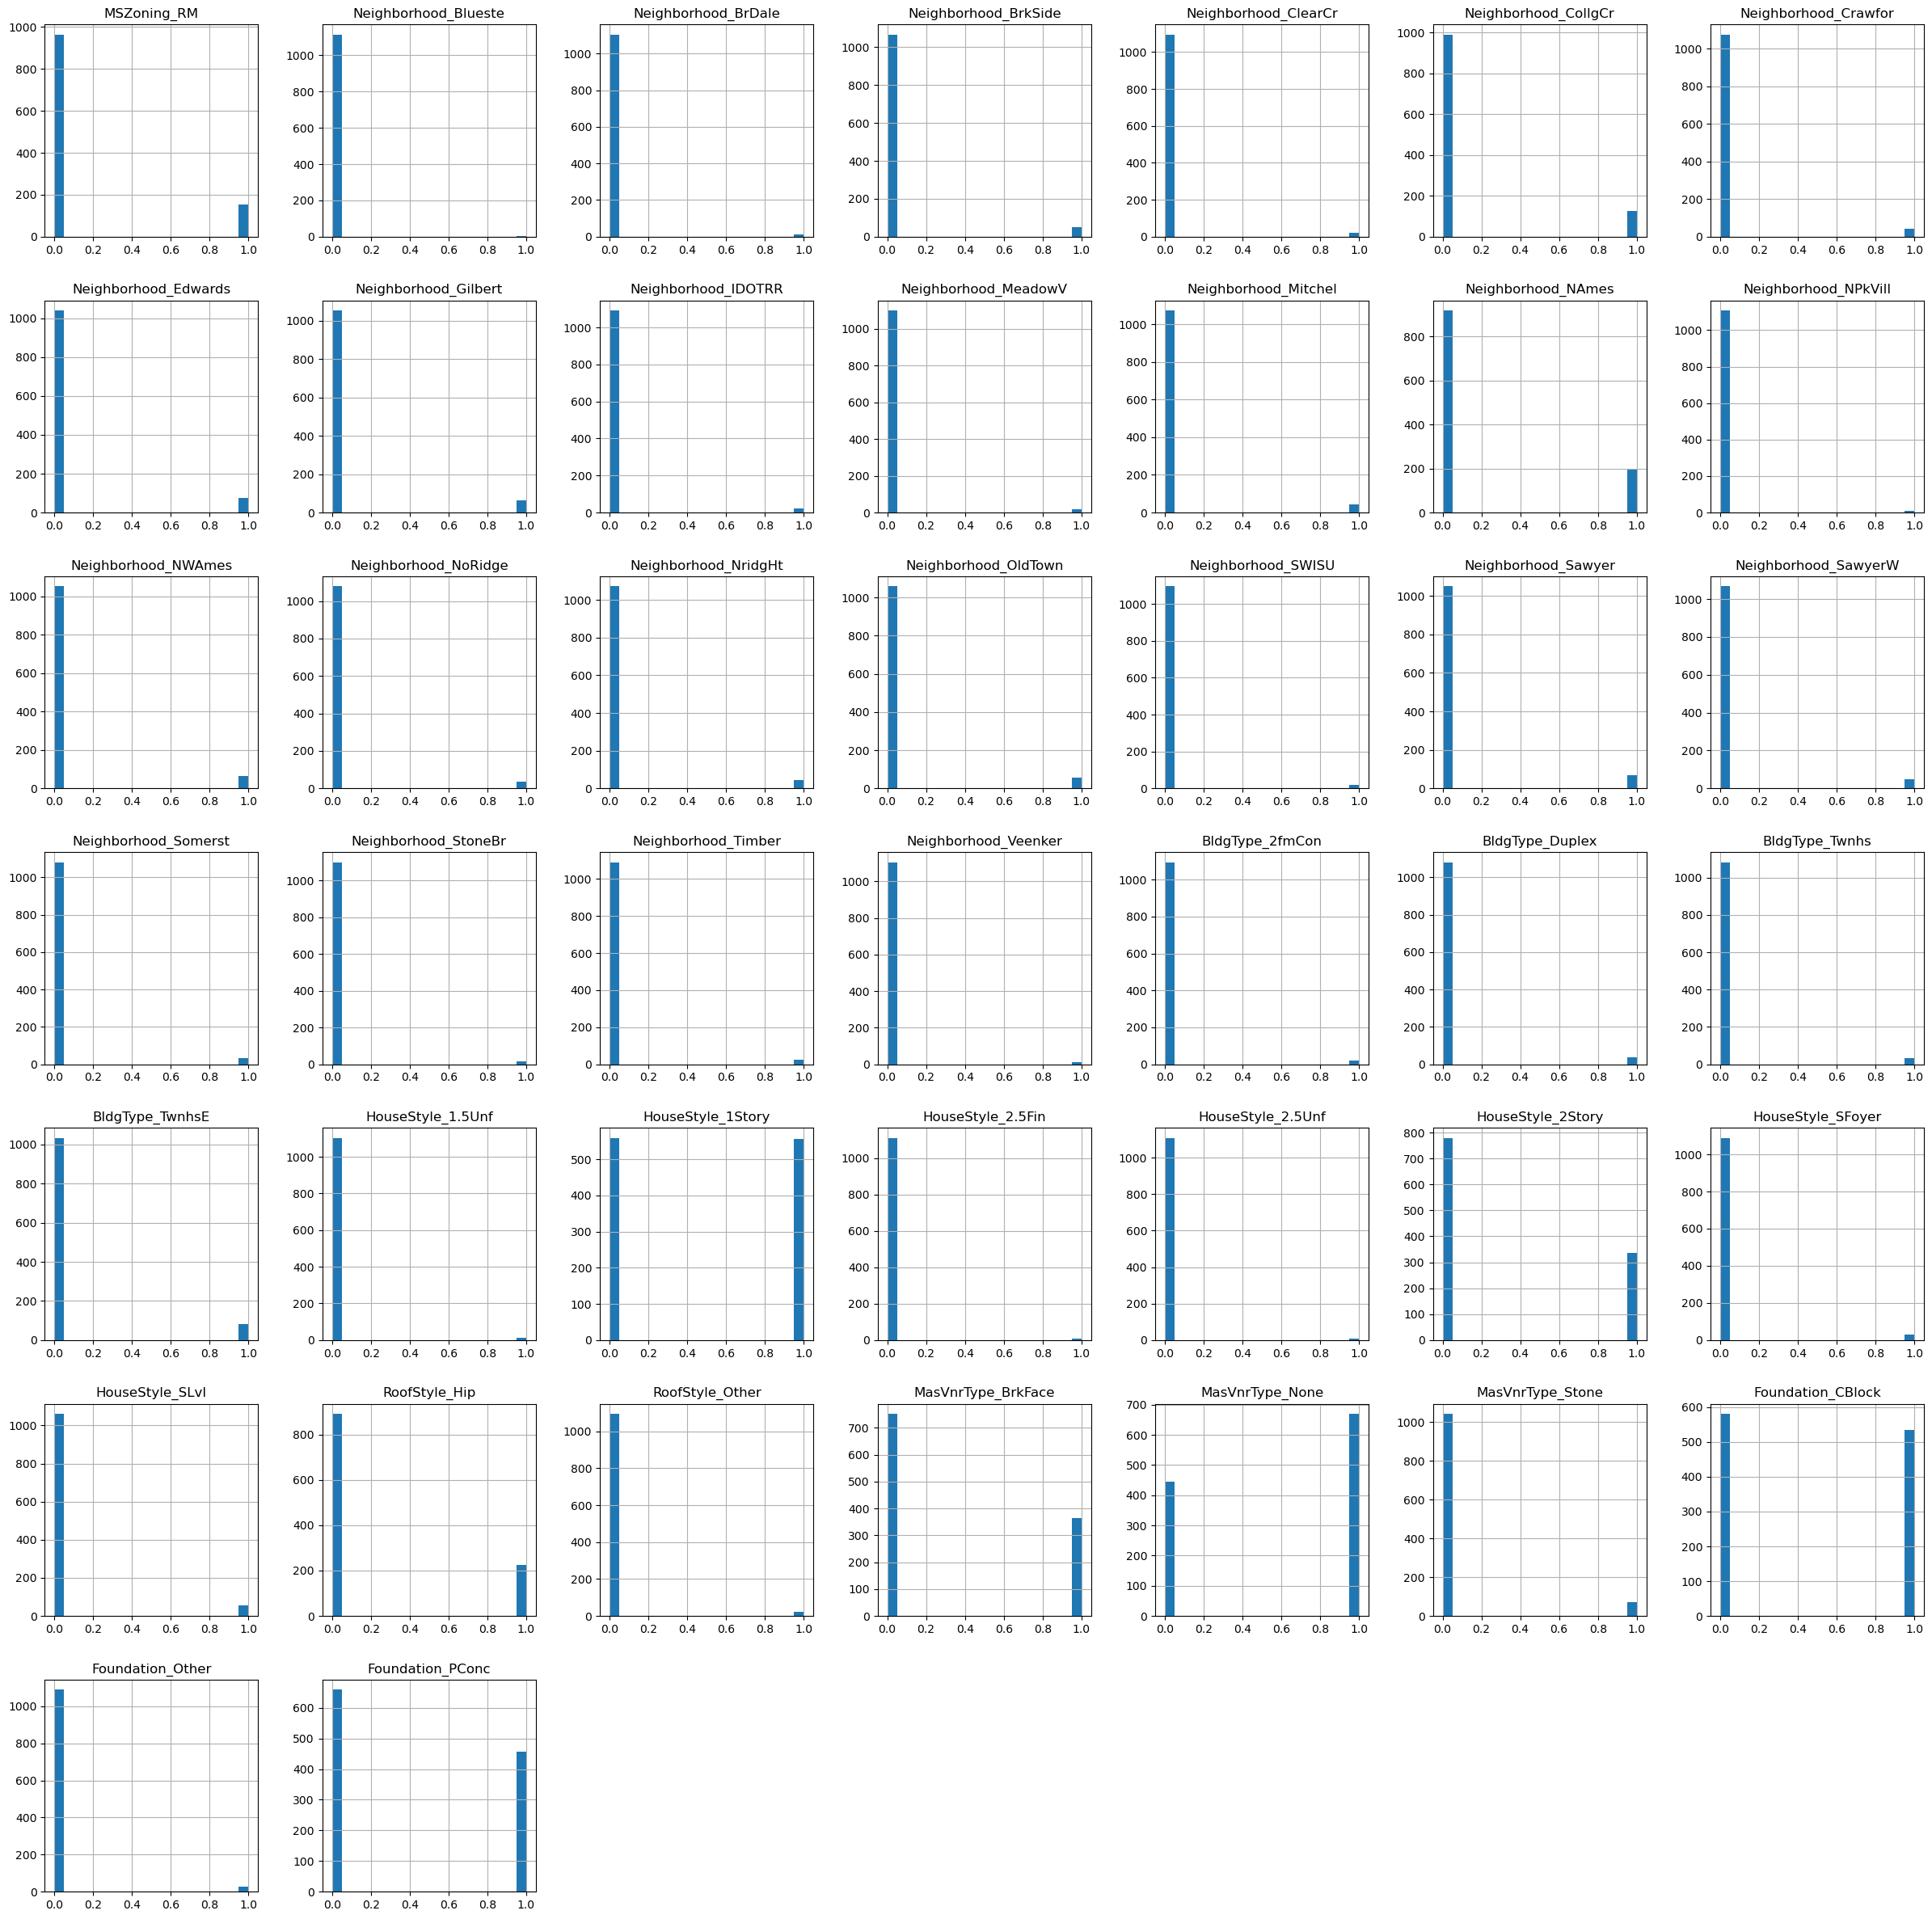

In [7]:
df.iloc[:,101:].hist(bins=20, figsize=(30,30))
plt.show()

### Transforming the SalePrice to a boolean, 1 if Price > 180000 else 0

In [8]:
df.isna().sum().sum()

0

In [9]:
df['SalePrice']=pd.Series([1 if i>=180000 else 0 for i in df.SalePrice]).astype('category')


In [24]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state =42)

x_train =df_train.drop('SalePrice', axis=1)
y_train =df_train['SalePrice']

### Base Model XGboost

In [11]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=42)
grid_search= GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True)

grid_search.fit(x_train, y_train,verbose = 2)

Fitting 10 folds for each of 96 candidates, totalling 960 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [12]:
model = grid_search.best_estimator_

In [13]:
x_test =df_test.drop('SalePrice', axis=1)
y_test =df_test['SalePrice']

### Best Score Base Model : XgBoost

In [14]:
model.score(x_test,y_test)


0.9313432835820895

C:\Users\Usuario\anaconda3\lib\site-packages\seaborn\matrix.py:654: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



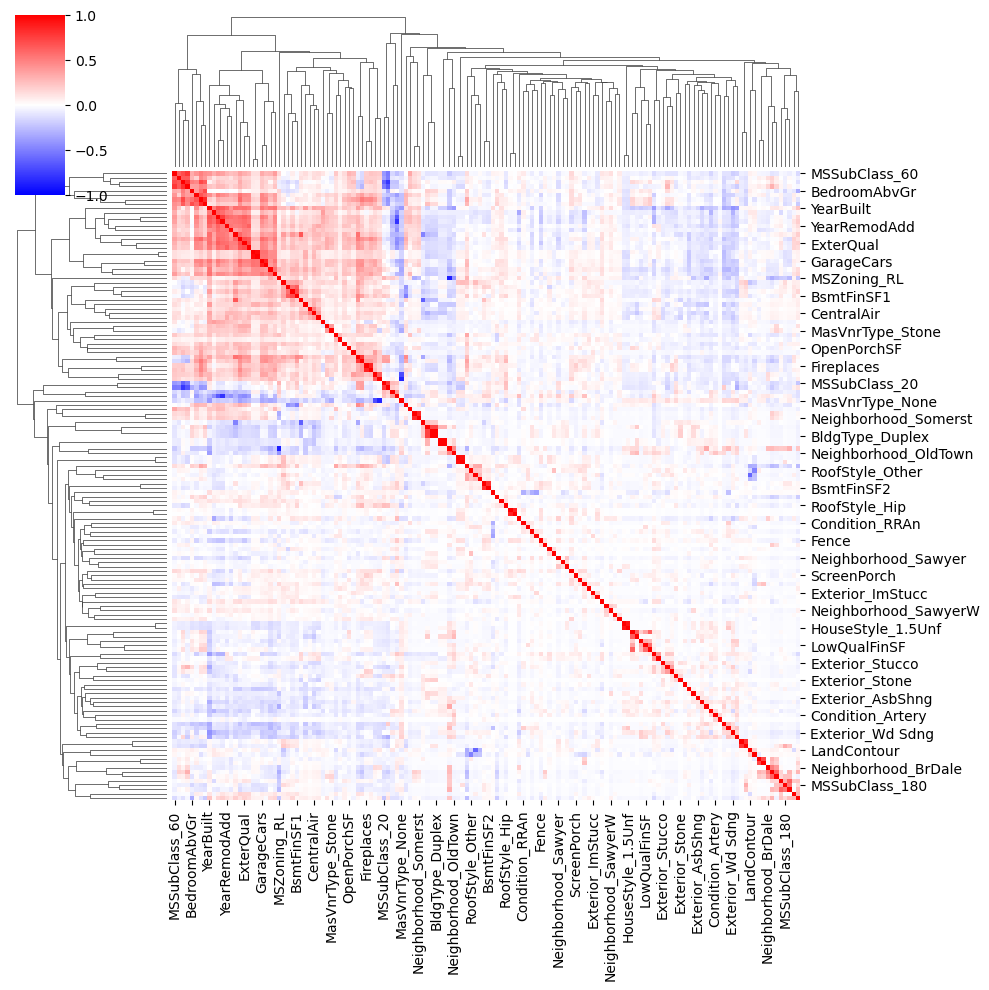

In [15]:
import seaborn as sns

sns.clustermap(df.corr(), cmap="bwr", vmin=-1, vmax=1);

### Trying  Feature Importance to Base Model

In [16]:
x = pd.DataFrame(model.feature_importances_, columns=["variable"], index=x_train.columns).abs()
x.sort_values(by="variable", ascending=False)

,variable
OverallQual,0.179772
FullBath,0.099422
GarageCars,0.074880
KitchenQual,0.072669
GrLivArea,0.054319
ExterQual,0.049120
LotShape,0.049083
GarageFinish,0.044457
YearRemodAdd,0.026020
GarageArea,0.022630


### Creating list with important features

In [17]:
important_features = list(x[x.variable>0.0].index)

In [18]:
grid_search.fit(x_train.loc[:,important_features], y_train,verbose = 2)
model1 = grid_search.best_estimator_

Fitting 10 folds for each of 96 candidates, totalling 960 fits


## Score with Feature Importance ( lower than base model)

In [19]:
model1.score(x_test.loc[:,important_features], y_test)

0.9134328358208955

### Model 2 : Extra Trees Classifier 

In [20]:
xt_clf = ExtraTreesClassifier(random_state = 42)
parameters ={'max_depth': [14,15,16,17,18,19,20, 21, 22, 23, 24, 25, 26, None],
             'criterion': ['gini', 'entropy'],
             'min_samples_split': [2, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377]}
clf = GridSearchCV(xt_clf, parameters, cv=5, verbose=2, n_jobs=10)        
clf.fit(x_train, y_train)

Fitting 5 folds for each of 308 candidates, totalling 1540 fits


GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=42), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [14, 15, 16, 17, 18, 19, 20, 21, 22, 23,
                                       24, 25, 26, None],
                         'min_samples_split': [2, 5, 8, 13, 21, 34, 55, 89, 144,
                                               233, 377]},
             verbose=2)

In [21]:
model2 = clf.best_estimator_
model2.score(x_test,y_test)

0.9313432835820895

Model 1